# K-Means Clustering

## Preparação dos dados

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.shape

(150, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Visualização dos dados

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

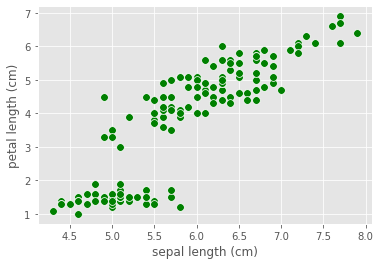

In [7]:
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", data=df, s=60, color="green")

# plt.savefig("scatterplot.png", dpi=100)

## Modelagem

In [8]:
from sklearn.cluster import KMeans

data = df[["sepal length (cm)", "petal length (cm)"]].values
model = KMeans(n_clusters=3, random_state=10)
model.fit(data)

KMeans(n_clusters=3, random_state=10)

## Análise dos resultados

In [9]:
centroids = model.cluster_centers_
centroids

array([[5.00784314, 1.49215686],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

In [10]:
labels = model.predict(data)

## Visualizar os resultados

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

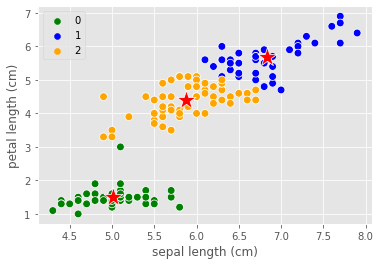

In [12]:
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", data=df, s=60, hue=labels, palette=["green", "blue", "orange"])
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker="*", s=400, color="red")

## Encontrando o número ótimo de agrupamentos

Elbow method

In [13]:
model.inertia_

53.80997864410694

Text(0, 0.5, 'Distortion')

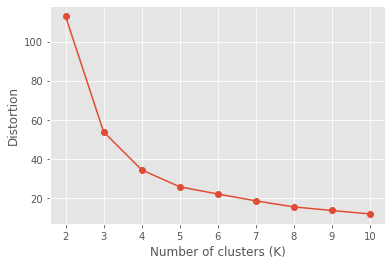

In [14]:
distortions = []

for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=10)
    kmeans_model.fit(data)
    distortions.append(kmeans_model.inertia_)

plt.plot(range(2, 11), distortions, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Distortion")